In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

The idea is to solve the following system of equations

k(t) is capital per person

c(t) is consumption per person

y(t) is income per person

i(t) is investment per person

A(t) is some measure of technology


delta is the capital depreciation rate

n(t) is the population growth rate

s is the savings rate

alpha is between 0 and 1 and measures the effectiveness of capital 


k'(t) = i(t) - (delta + n(t))k(t) = sy(t) - (delta + n(t))k(t) Capital evolution equation

c(t) + i(t) = y(t) All income spent on consumption or investment

i(t) = sy(t) Investment is savings rate times total income

y(t) = A(t)k(t)^alpha

In [2]:
#Define a function to return the income per person in the economy. 
def y(k, alpha=0.5, A=1):
    return A*k**alpha

#The captital evolution equation
def kprime(k, alpha=0.5, s=0.3, delta=0.08, n=0.01, A=1):
    return s*y(k, alpha, A) - (delta + n)*k


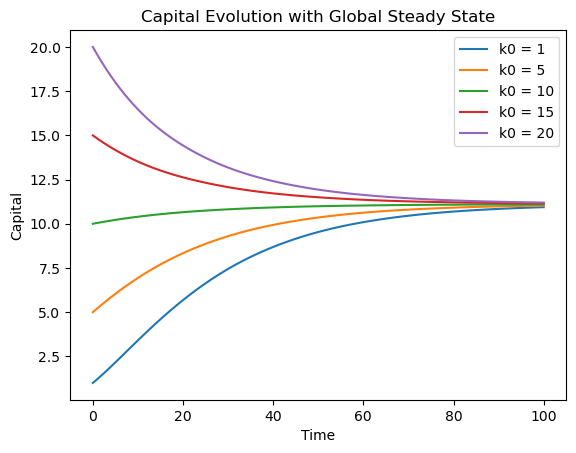

In [7]:
#A very simple model where capital trends towards a global steady state
def ksolve(t, k, alpha=0.5, s=0.3, delta=0.08, n=0.01, A=1):
    return kprime(k, alpha=0.5, s=0.3, delta=0.08, n=0.01, A=1)

#Time domain
t_span = (0,100)
T = np.linspace(0,100,101)

#Initial conditions
k0 = [1]
k1 = [5]
k2 = [10]
k3 = [15]
k4 = [20]

#Solve with different initial conditions
sol0 = solve_ivp(ksolve, t_span, k0, t_eval=T)
sol1 = solve_ivp(ksolve, t_span, k1, t_eval=T)
sol2 = solve_ivp(ksolve, t_span, k2, t_eval=T)
sol3 = solve_ivp(ksolve, t_span, k3, t_eval=T)
sol4 = solve_ivp(ksolve, t_span, k4, t_eval=T)


#Make the plots
f = plt.figure()
plt.plot(T, sol0.y.reshape(-1), label='k0 = 1')
plt.plot(T, sol1.y.reshape(-1), label='k0 = 5')
plt.plot(T, sol2.y.reshape(-1), label='k0 = 10')
plt.plot(T, sol3.y.reshape(-1), label='k0 = 15')
plt.plot(T, sol4.y.reshape(-1), label='k0 = 20')

plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend()
plt.title("Capital Evolution with Global Steady State")
plt.show()
f.savefig("global_steady_state.pdf", bbox_inches='tight')

Now we model an economy with an inhomogeneous population. For simplicity, we will accpept 4 different population buckets: children, young adults, middle aged, and retired. Children and retired people are assumed to contribute nothing to GDP, while young adults contribute 1 unit each and middle aged people contribute 1.5 units each. In this case, we assume that the population is divided as follows: 0.2, 0.3, 0.3, 0.2 and there is no change over time. 


With slight changes, we can get the same equations to model what happens as the population changes. 

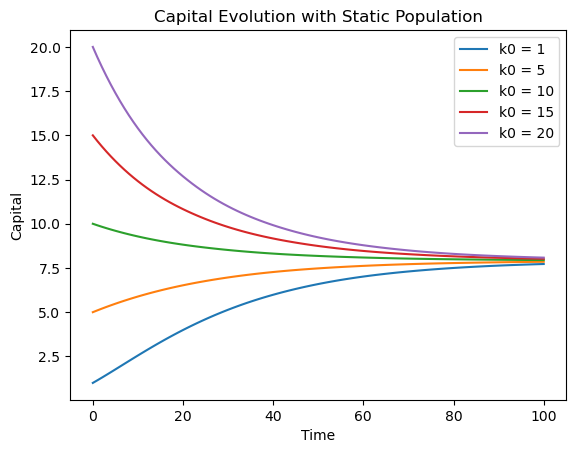

[7.72424666]


In [4]:
def y_pop(k, N = np.array([0.2, 0.3, 0.3, 0.2]), C=np.array([0,1,1.5, 0]), alpha=0.5, A=1):
    #N is a vector with the breakdown of population by age
    #C is a vector with the contribution of each age demographic
    
    return np.inner(N, C)*y(k, alpha=alpha, A=A)

#Now we solve the thing with these slight modifications
def kprime_pop(k,  N = np.array([0.2, 0.3, 0.3, 0.2]), C=np.array([0,1,1.5, 0]), alpha=0.5, s=0.3, delta=0.08, n=0.0, A=1):
    return s*y_pop(k, N, C, alpha, A) - (delta + n)*k

def ksolve_pop(t, k, N = np.array([0.2, 0.3, 0.3, 0.2]), C=np.array([0,1,1.5, 0]), alpha=0.5, s=0.3, delta=0.08, n=0.0, A=1):
    return kprime_pop(k, N, C, alpha, s, delta, n, A)

#Time domain
t_span = (0,100)
T = np.linspace(0,100,101)

#Initial conditions
k0 = [1]
k1 = [5]
k2 = [10]
k3 = [15]
k4 = [20]

#Solve with different initial conditions
sol0 = solve_ivp(ksolve_pop, t_span, k0, t_eval=T)
sol1 = solve_ivp(ksolve_pop, t_span, k1, t_eval=T)
sol2 = solve_ivp(ksolve_pop, t_span, k2, t_eval=T)
sol3 = solve_ivp(ksolve_pop, t_span, k3, t_eval=T)
sol4 = solve_ivp(ksolve_pop, t_span, k4, t_eval=T)


#Make the plots
plt.plot(T, sol0.y.reshape(-1), label='k0 = 1')
plt.plot(T, sol1.y.reshape(-1), label='k0 = 5')
plt.plot(T, sol2.y.reshape(-1), label='k0 = 10')
plt.plot(T, sol3.y.reshape(-1), label='k0 = 15')
plt.plot(T, sol4.y.reshape(-1), label='k0 = 20')

plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend()
plt.title("Capital Evolution with Static Population")
plt.show()

print(sol0.y[:, -1])

In this case, because the entire population is not assumed to be working, the steady state level of capital is lower than in the case where everyone worked. 

Finally, we will illustrate a simple example where the population is changing and model how capital evolves in that context. The only real difference is that now we must define a function which models how popluation changes. In our models we will use the SIR model, here, we will use a simpler one. 

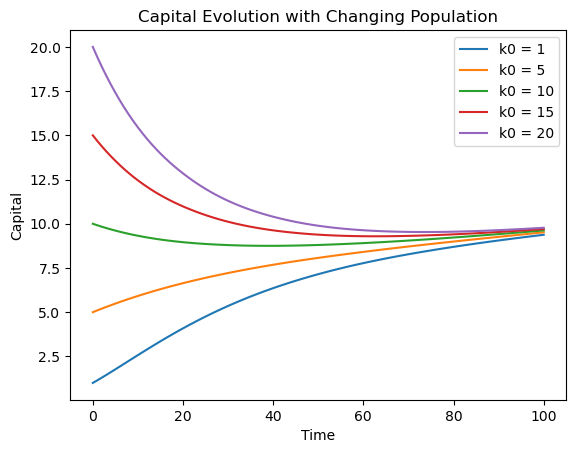

[9.37727137]


In [5]:

def age(t):
    #A slight aging of the population
    return np.array([0.2 - t/500, 0.3-t/500, 0.3+t/500, 0.2+t/500])

def ksolve_pop2(t, k, N = age, C=np.array([0,1,1.5, 0]), alpha=0.5, s=0.3, delta=0.08, n=0.00, A=1):
    N_t = N(t)
    return kprime_pop(k, N_t, C, alpha, s, delta, n, A)

#Time domain
t_span = (0,100)
T = np.linspace(0,100,101)

#Initial conditions
k0 = [1]
k1 = [5]
k2 = [10]
k3 = [15]
k4 = [20]

#Solve with different initial conditions
sol0 = solve_ivp(ksolve_pop2, t_span, k0, t_eval=T)
sol1 = solve_ivp(ksolve_pop2, t_span, k1, t_eval=T)
sol2 = solve_ivp(ksolve_pop2, t_span, k2, t_eval=T)
sol3 = solve_ivp(ksolve_pop2, t_span, k3, t_eval=T)
sol4 = solve_ivp(ksolve_pop2, t_span, k4, t_eval=T)


#Make the plots
plt.plot(T, sol0.y.reshape(-1), label='k0 = 1')
plt.plot(T, sol1.y.reshape(-1), label='k0 = 5')
plt.plot(T, sol2.y.reshape(-1), label='k0 = 10')
plt.plot(T, sol3.y.reshape(-1), label='k0 = 15')
plt.plot(T, sol4.y.reshape(-1), label='k0 = 20')

plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend()
plt.title("Capital Evolution with Changing Population")
plt.show()

print(sol0.y[:, -1])

In this case, we can see that the capital steady state reaches a slightly higher level than it did previously. If we change the function age(t) to return an SIR model we can get a more realistic picture. Furthermore, the function can be modified to accept A as a function of t, as well as changes in all other parameters. In this case, there was no change in the total population, but if that were the case then the parameter n would need to reflect that. 

Now I am going to create a government spending model. 

The average retired person gets 20,000 a year in social security. We will assume that the government makes small payments to those who are not retired - 5,000 a year, although that is surely an underestimate. Medicare is about another 15,000 a year per retired person. 

This report has some data on government spending programs: https://www.cbo.gov/sites/default/files/cbofiles/ftpdocs/23xx/doc2300/fsec.pdf



Government expenditure is not invested into the future, so we actually have to subtract it out of whatever we are producing before getting the rate of increase of capital. This next model assumes a constant population, but takes into account that what the government is spending is not in the hands of people to invest

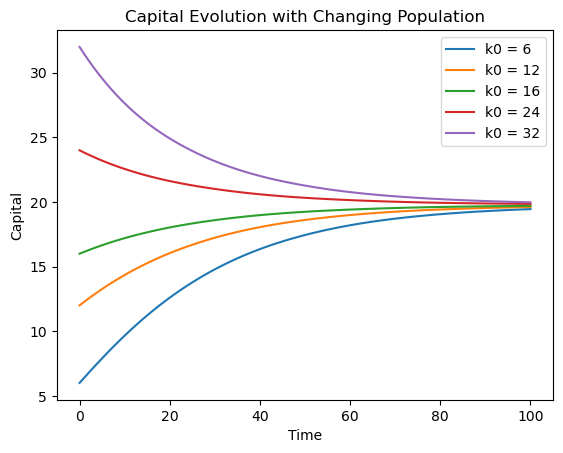

[1.94504596e+10]


In [6]:
def expenditure(N = np.array([.2*10e8, .3*10e8, .3*10e8, .2*10e8]), S=np.array([0, 0, 0, 35*10e3])):
    #N is a vector of the number of people in each age bracket
    #S is a vector of payment rates the government makes to those people
    return np.inner(N, S)

def y_pop(k, N, C, alpha=0.2, A=1):
    #N is a vector with the breakdown of population by age
    #C is a vector with the contribution of each age demographic
    return np.inner(N, C) * k**alpha * A

def kprime_pop2(k,  N, C, alpha=0.5, s=0.3, delta=0.08, n=0.0, A=1):
    return s*(y_pop(k, N, C, alpha, A)  - expenditure(N)) / np.sum(N) - (delta + n)*k

age = np.array([.2*10e8, .3*10e8, .3*10e8, .2*10e8])
def ksolve_pop3(t, k, N = age, C=np.array([0,50000,75000, 0]), alpha=0.5, s=0.3, delta=0.08, n=0.00, A=1):
    N_t = N
    return kprime_pop2(k, N_t, C, alpha, s, delta, n, A)

#Time domain
t_span = (0,100)
T = np.linspace(0,100,101)

#Initial conditions
k0 = [6*10e8]
k1 = [12*10e8]
k2 = [16*10e8]
k3 = [24*10e8]
k4 = [32*10e8]

age = np.array([.2*10e8, .3*10e8, .3*10e8, .2*10e8])

#Solve with different initial conditions
sol0 = solve_ivp(ksolve_pop3, t_span, k0, t_eval=T)
sol1 = solve_ivp(ksolve_pop3, t_span, k1, t_eval=T)
sol2 = solve_ivp(ksolve_pop3, t_span, k2, t_eval=T)
sol3 = solve_ivp(ksolve_pop3, t_span, k3, t_eval=T)
sol4 = solve_ivp(ksolve_pop3, t_span, k4, t_eval=T)

#Make the plots
plt.plot(T, sol0.y.reshape(-1)/10e8, label='k0 = 6')
plt.plot(T, sol1.y.reshape(-1)/10e8, label='k0 = 12')
plt.plot(T, sol2.y.reshape(-1)/10e8, label='k0 = 16')
plt.plot(T, sol3.y.reshape(-1)/10e8, label='k0 = 24')
plt.plot(T, sol4.y.reshape(-1)/10e8, label='k0 = 32')

plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend()
plt.title("Capital Evolution with Changing Population")
plt.show()

print(sol0.y[:, -1])